In [20]:
import pandas as pd

# Load the Excel file

df = pd.read_csv("/content/data.csv")

In [21]:
# Melt the wide-format data to long format

df_melted = df.melt(id_vars=['Series Name', 'Series Code'], var_name='Year_Country', value_name='Value')

In [22]:
# Extract 'Year' and 'Country' from 'Year_Country' column
# Example format: "2015 [YR2015] - United States [USA]"

df_melted[['Year', 'Country']] = df_melted['Year_Country'].str.extract(r'(\d{4}).*-\s(.*)\s\[')

In [23]:
# Reorder and clean columns

df_clean = df_melted[['Series Name', 'Series Code', 'Year', 'Country', 'Value']]

In [24]:
# To fill null values with 0

df_melted['Value'] = df_melted['Value'].fillna(0)

In [25]:
# Export cleaned data

df_clean.to_csv("cleaned_data.csv", index=False)

In [26]:
# Preview cleaned data

print(df_clean.head())

                                         Series Name Series Code  Year  \
0                   Bank capital to total assets (%)  GFDD.SI.03  2015   
1                   Bank credit to bank deposits (%)  GFDD.SI.04  2015   
2       Bank non-performing loans to gross loans (%)  GFDD.SI.02  2015   
3  Bank regulatory capital to risk-weighted asset...  GFDD.SI.05  2015   
4                                       Bank Z-score  GFDD.SI.01  2015   

         Country      Value  
0  United States  11.711053  
1  United States   62.77115  
2  United States  1.4734265  
3  United States   14.13736  
4  United States   34.13966  


# 📊 EDA on Healthcare, Finance & Tax Dataset (2015–2020)

Performing exploratory data analysis (EDA) on a multi-country dataset from 2015 to 2020 covering various economic and social indicators.

**Data Sources:** Cleaned from a multi-year Excel file with country-wise breakdowns  
**Tools:** Python, Pandas, Matplotlib, Seaborn


In [72]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional display settings
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")

In [41]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Preview
df.head()

,Series Name,Series Code,Year,Country,Value
0,Bank capital to total assets (%),GFDD.SI.03,2015,United States,11.711053
1,Bank credit to bank deposits (%),GFDD.SI.04,2015,United States,62.77115
2,Bank non-performing loans to gross loans (%),GFDD.SI.02,2015,United States,1.4734265
3,Bank regulatory capital to risk-weighted asset...,GFDD.SI.05,2015,United States,14.13736
4,Bank Z-score,GFDD.SI.01,2015,United States,34.13966


In [73]:
# convert the values in the Value column to numeric (int or float)

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [74]:
# To fill null values with 0

df['Value'] = df['Value'].fillna(0)

In [75]:
# Preview converted data

print("Preview of loaded and converted data:")
print(df.head())

Preview of loaded and converted data:
                                         Series Name Series Code  Year  \
0                   Bank capital to total assets (%)  GFDD.SI.03  2015   
1                   Bank credit to bank deposits (%)  GFDD.SI.04  2015   
2       Bank non-performing loans to gross loans (%)  GFDD.SI.02  2015   
3  Bank regulatory capital to risk-weighted asset...  GFDD.SI.05  2015   
4                                       Bank Z-score  GFDD.SI.01  2015   

         Country  Value  
0  United States  11.71  
1  United States  62.77  
2  United States   1.47  
3  United States  14.14  
4  United States  34.14  


In [76]:
print("\nData Info after conversion:")
df.info()


Data Info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Series Name  420 non-null    object 
 1   Series Code  360 non-null    object 
 2   Year         510 non-null    int64  
 3   Country      510 non-null    object 
 4   Value        510 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.1+ KB


In [77]:
# Summary statistics
print("\nSummary statistics after conversion:")
print(df.describe())


Summary statistics after conversion:
         Year  Value
count  510.00 510.00
mean  2017.50  14.00
std      1.71  25.26
min   2015.00   0.00
25%   2016.00   0.00
50%   2017.50   1.56
75%   2019.00  17.61
max   2020.00 157.81


In [78]:
# Check for remaining nulls
print("\nNull value check after conversion and fillna:")
print(df.isnull().sum())


Null value check after conversion and fillna:
Series Name     90
Series Code    150
Year             0
Country          0
Value            0
dtype: int64


In [79]:
# Strip whitespaces from categorical columns
df['Country'] = df['Country'].str.strip()
df['Series Name'] = df['Series Name'].str.strip()
df['Series Code'] = df['Series Code'].str.strip()

In [80]:
# Unique values check
print("\nUnique Countries:")
print(df['Country'].unique())


Unique Countries:
['United States' 'United Kingdom' 'United Arab Emirates'
 'Hong Kong SAR, China' 'Singapore']


**📊 Univariate Analysis- Explore value distributions for different series over years.**

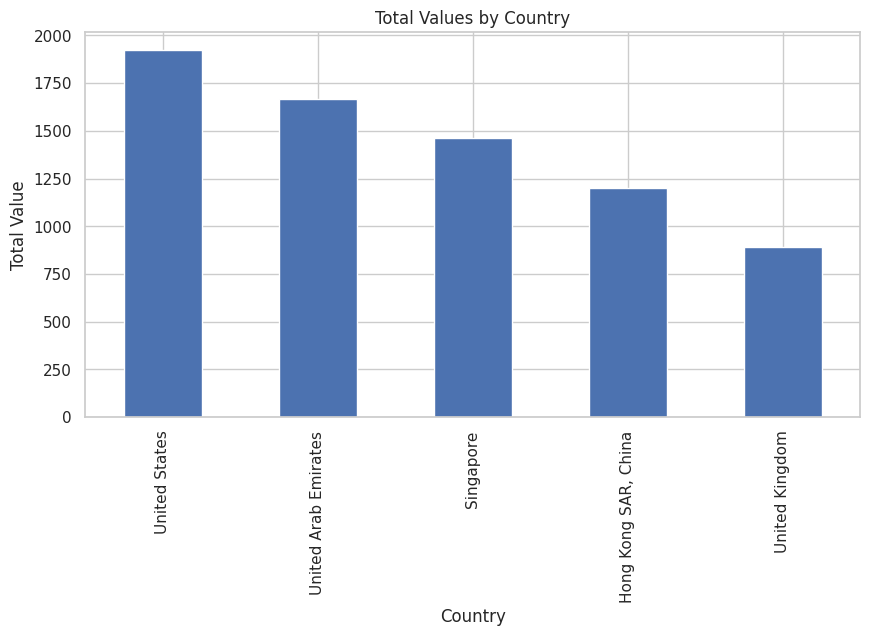

In [82]:
# Plotting
df.groupby('Country')['Value'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Total Values by Country")
plt.ylabel("Total Value")
plt.show()

**🏆 Top 5 Countries by Value for Each Year**

In [83]:
top5_by_year = df.groupby(['Year', 'Country'])['Value'].sum().reset_index()
top5_by_year = top5_by_year.sort_values(['Year', 'Value'], ascending=[True, False])

# View top 5 per year
for year in df['Year'].unique():
    print(f"📅 Year: {year}")
    display(top5_by_year[top5_by_year['Year'] == year].head(5))

📅 Year: 2015


,Year,Country,Value
4,2015,United States,327.80
2,2015,United Arab Emirates,285.91
1,2015,Singapore,243.92
0,2015,"Hong Kong SAR, China",190.08
3,2015,United Kingdom,147.10


📅 Year: 2016


,Year,Country,Value
9,2016,United States,325.98
7,2016,United Arab Emirates,286.57
6,2016,Singapore,243.17
5,2016,"Hong Kong SAR, China",182.70
8,2016,United Kingdom,144.66


📅 Year: 2017


,Year,Country,Value
14,2017,United States,322.06
12,2017,United Arab Emirates,278.26
11,2017,Singapore,260.04
10,2017,"Hong Kong SAR, China",191.98
13,2017,United Kingdom,154.80


📅 Year: 2018


,Year,Country,Value
19,2018,United States,327.35
17,2018,United Arab Emirates,289.51
16,2018,Singapore,269.33
15,2018,"Hong Kong SAR, China",215.53
18,2018,United Kingdom,148.47


📅 Year: 2019


,Year,Country,Value
24,2019,United States,320.26
22,2019,United Arab Emirates,274.85
21,2019,Singapore,267.01
20,2019,"Hong Kong SAR, China",214.00
23,2019,United Kingdom,149.17


📅 Year: 2020


,Year,Country,Value
29,2020,United States,298.40
27,2020,United Arab Emirates,254.20
25,2020,"Hong Kong SAR, China",204.07
26,2020,Singapore,177.50
28,2020,United Kingdom,145.68
